<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

pagina = 'estados-bruto.xml'

with open(pagina, 'r', encoding='utf-8') as arquivo:
    conteudo = arquivo.read()

fonte = BeautifulSoup(conteudo, 'lxml')

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados
dados_estados = []
for estado in fonte.find_all('estado'):
    dados_estado = [
        estado.find('nome').text.strip(),
        estado.find('sigla').text.strip(),
        estado.find('regiao').text.strip()
    ]
    dados_estados.append(dados_estado)


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv
arquivo_destino = 'estados-limpo.csv'
header = ['estado', 'sigla', 'regiao']

# Escrever o conteúdo extraído no arquivo CSV separado por ;
with open(arquivo_destino, 'w', newline='', encoding='utf-8') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv, delimiter=';')
    escritor_csv.writerow(header)
    escritor_csv.writerows(dados_estados)

print(f'Dados extraídos e salvos em {arquivo_destino}')


Dados extraídos e salvos em estados-limpo.csv


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

df = pd.read_csv('cidades-bruto.csv')


df.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [6]:
# Usando o método rename para renomear as colunas
df.rename(columns={
    'UF': 'estado',
    'nome': 'cidade',
    'Pop_est_2009': 'populacao'
}, inplace=True)


In [7]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
dados_selecionados = ['estado', 'cidade', 'populacao', 'PIB', 'PIB_percapita']

cidades_limpo = df[dados_selecionados]

cidades_limpo.to_csv('cidades-limpo.csv', sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [8]:
# solução do exercício 1.3
cidades_limpo['estado'].unique()

array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS',
       'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO',
       'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ',
       'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ',
       'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE',
       'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'], dtype=object)

In [9]:
est = pd.read_csv('estados-limpo.csv')

In [10]:
coluna_completa = est['estado;sigla;regiao']

# Dividindo a coluna em três colunas separadas usando o ponto e vírgula como delimitador
novas_colunas = coluna_completa.str.split(';', expand=True)

novas_colunas.columns = ['estado', 'sigla', 'regiao']

est = pd.concat([est, novas_colunas], axis=1)

# Agora você pode acessar a coluna 'estado'
print(est['estado'].tolist())


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']


In [11]:
# Lista de valores únicos da coluna 'estado' em est
valores_est = est['estado'].tolist()

# Filtrar as linhas em novo_df onde a coluna 'estado' está na lista valores_est
brasil = cidades_limpo[cidades_limpo['estado'].isin(valores_est)]

# Exibir o novo DataFrame filtrado
brasil.head()


,estado,cidade,populacao,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
5,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195


In [12]:
brasil = brasil.sort_values(by='estado')
brasil.head()

,estado,cidade,populacao,PIB,PIB_percapita
4924,ACRE,Xapuri,15079,150262.343750,9965.009766
83,ACRE,Marechal Thaumaturgo,14275,109181.867188,7648.470215
1767,ACRE,Santa Rosa do Purus,4358,28091.173828,6445.890137
5336,ACRE,Jordão,6520,41673.136719,6391.589844
4362,ACRE,Porto Walter,8855,64432.355469,7276.379883


In [13]:
brasil.isna().sum()

estado           0
cidade           1
populacao        0
PIB              0
PIB_percapita    0
dtype: int64

In [14]:
brasil = brasil.dropna(subset=['cidade'])

In [15]:
brasil.isna().sum()

estado           0
cidade           0
populacao        0
PIB              0
PIB_percapita    0
dtype: int64

In [16]:
brasil.to_csv('brasil.csv', sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [17]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv')

In [18]:
# Dividir a coluna única em colunas separadas
brasil_df = brasil_df['estado;cidade;populacao;PIB;PIB_percapita'].str.split(';', expand=True)

# Renomear as colunas
brasil_df.columns = ['estado', 'cidade', 'populacao', 'PIB', 'PIB_percapita']

brasil_df.columns

Index(['estado', 'cidade', 'populacao', 'PIB', 'PIB_percapita'], dtype='object')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [19]:
# código para responder a pergunta
brasil_df.head(10)

,estado,cidade,populacao,PIB,PIB_percapita
0,ACRE,Xapuri,15079,150262.34375,9965.00976562
1,ACRE,Marechal Thaumaturgo,14275,109181.8671875,7648.47021484
2,ACRE,Santa Rosa do Purus,4358,28091.17382812,6445.89013672
3,ACRE,Jordão,6520,41673.13671875,6391.58984375
4,ACRE,Porto Walter,8855,64432.35546875,7276.37988281
5,ACRE,Sena Madureira,36166,371556.0625,10273.62988281
6,ACRE,Senador Guiomard,19697,217153.859375,11024.71972656
7,ACRE,Rio Branco,305954,3837370.75,12542.30957031
8,ACRE,Bujari,6772,88708.03125,13099.24023438
9,ACRE,Rodrigues Alves,13460,153169.609375,11379.61035156


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [20]:
brasil_df.dtypes

estado           object
cidade           object
populacao        object
PIB              object
PIB_percapita    object
dtype: object

In [21]:
# Lista de colunas a serem transformadas
colunas_numericas = ['populacao', 'PIB', 'PIB_percapita']

# Loop para percorrer cada coluna
for coluna in colunas_numericas:
    # Verifica se a coluna precisa remover o caractere '.' e converte para numérico
    if '.' in brasil_df[coluna].iloc[0]:
        brasil_df[coluna] = pd.to_numeric(brasil_df[coluna].str.replace('.', ''), errors='coerce')
    else:
        brasil_df[coluna] = pd.to_numeric(brasil_df[coluna], errors='coerce')


In [22]:
# código para responder a pergunta
# Criar um DataFrame com as 5 menores valores da coluna PIB_percapita
cinco_menores_pib = brasil_df.nsmallest(5, 'PIB_percapita')

# Mostrar o resultado
print(cinco_menores_pib)

      estado          cidade  populacao            PIB  PIB_percapita
202    BAHIA  Várzea da Roça      15171    45801265625          30190
415    BAHIA        Caturama       8713         264570          30365
412    BAHIA          Pedrão       7597  2482699804688          32680
66   ALAGOAS   Pão de Açúcar      24534   853047265625          34770
579    BAHIA        Jussiape       8043  2854464453125          35490


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [23]:
# código para responder a pergunta
quinze_maiores_pib = brasil_df.nlargest(15, 'PIB')

# Mostrar o resultado
print(quinze_maiores_pib)


                   estado         cidade  populacao            PIB   
1778           PERNAMBUCO        Afrânio      17445  6547771484375  \
2267    RIO GRANDE DO SUL     Passa Sete       5280  6530601171875   
1815           PERNAMBUCO      Vertentes      18186  6529519921875   
794           MATO GROSSO  Alto Paraguai       8329  6518601953125   
2130  RIO GRANDE DO NORTE        Tangará      13610  6510689453125   
1748         MINAS GERAIS  Alto Rio Doce      12778  6509745703125   
1368         MINAS GERAIS    Cordisburgo       9465  6487832421875   
368                 BAHIA          Mairi      19700  6485429296875   
4                    ACRE   Porto Walter       8855  6443235546875   
2876       SANTA CATARINA   Timbé do Sul       5260  6428810546875   
1341         MINAS GERAIS       Itanhomi      12357  6397562109375   
2629    RIO GRANDE DO SUL    Barra Funda       2453  6394212890625   
1288         MINAS GERAIS        Jacinto      12923  6390641796875   
160              AMA

 - Qual é o PIB do estado de Santa Catarina?

In [24]:
# código para responder a pergunta
# Filtra as linhas correspondentes ao estado de Santa Catarina
sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']

# Soma os valores da coluna 'PIB' para Santa Catarina
total_pib_sc = sc_df['PIB'].sum()

print(f"O total do PIB de Santa Catarina é: {total_pib_sc}")


O total do PIB de Santa Catarina é: 267102598634581


 - Qual é o população da região sul?

In [25]:
# código para responder a pergunta
estados_desejados = ['SANTA CATARINA', 'PARANA', 'RIO GRANDE DO SUL']

# Filtra as linhas correspondentes aos estados desejados
estados_sul = brasil_df[brasil_df['estado'].isin(estados_desejados)]

# Soma os valores da coluna 'populacao' para a região sul
total_populacao_sul = estados_sul['populacao'].sum()

print(f"O total da população da região sul é: {total_populacao_sul}")


O total da população da região sul é: 17032871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [30]:
# código para responder a pergunta
PIB_MTS = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']

pib_medio_mts = PIB_MTS['PIB_percapita'].mean()

print(f"O valor do PIB per capita médio do Rio Grande do Sul é: {pib_medio_mts}")

O valor do PIB per capita médio do Rio Grande do Sul é: 1129876117681.987


 - Qual é a população do Brasil?

In [31]:
# código para responder a pergunta
total_populacao = brasil_df['populacao'].sum()

print(f"O total da população do Brasil é: {total_populacao}")

O total da população do Brasil é: 102094000


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

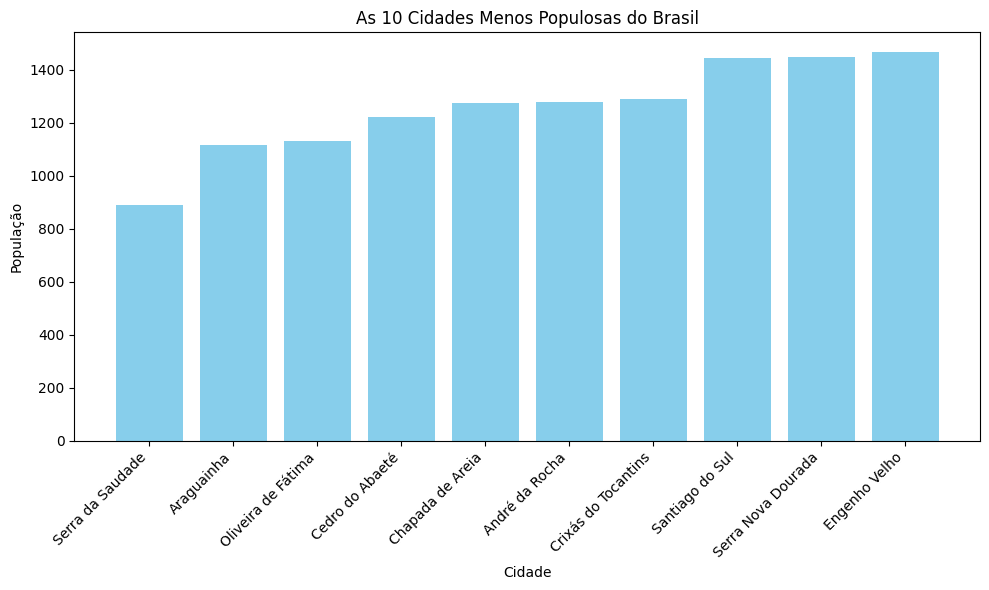

In [32]:
# código para gerar a visualização
import matplotlib.pyplot as plt

# Ordena o DataFrame pelas populações em ordem crescente
cidades_menos_populosas = brasil_df.sort_values(by='populacao', ascending=True).head(10)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cidades_menos_populosas['cidade'], cidades_menos_populosas['populacao'], color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('População')
plt.title('As 10 Cidades Menos Populosas do Brasil')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibe o gráfico
plt.show()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

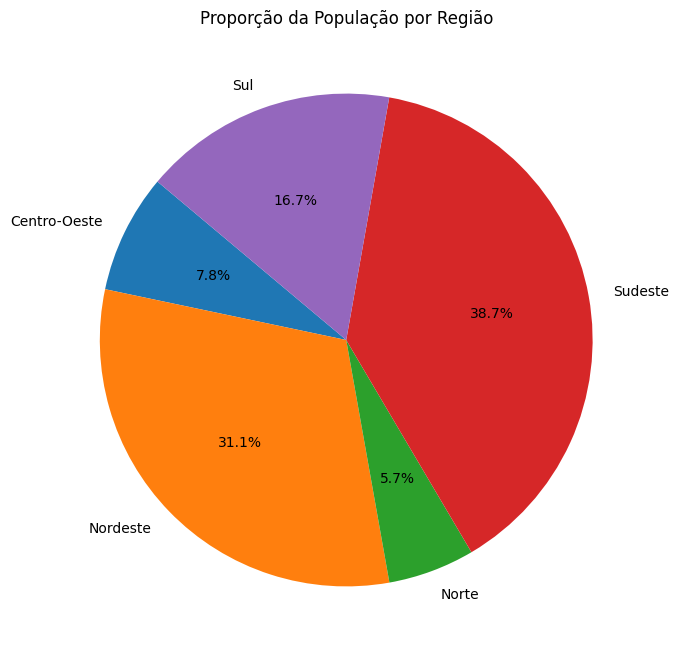

In [33]:
# código para gerar a visualização
# Criar um dicionário com a correspondência entre estados e regiões
regioes_estados = {
    'Norte': ['AMAZONAS', 'RORAIMA', 'AMAPA', 'PARA', 'TOCANTINS', 'RONDONIA', 'ACRE'],
    'Nordeste': ['MARANHAO', 'PIAUI', 'CEARA', 'RIO GRANDE DO NORTE', 'PERNAMBUCO', 'PARAIBA', 'SERGIPE', 'ALAGOAS', 'BAHIA'],
    'Sudeste': ['SAO PAULO', 'RIO DE JANEIRO', 'MINAS GERAIS', 'ESPIRITO SANTO'],
    'Sul': ['PARANA', 'SANTA CATARINA', 'RIO GRANDE DO SUL'],
    'Centro-Oeste': ['MATO GROSSO', 'MATO GROSSO DO SUL', 'GOIAS', 'DISTRITO FEDERAL']
}

# Criar uma nova coluna 'regiao' no DataFrame original com base na correspondência
brasil_df['regiao'] = brasil_df['estado'].map({estado: regiao for regiao, estados in regioes_estados.items() for estado in estados})

# Criar um novo DataFrame com a população total de cada região
populacao_regiao = brasil_df.groupby('regiao')['populacao'].sum().reset_index()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(populacao_regiao['populacao'], labels=populacao_regiao['regiao'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção da População por Região')
plt.show()
